In [146]:
import sys
if '../' not in sys.path:
    sys.path.append('../')

In [147]:
from simulab.simulation.core.runner import Runner, Execute
from simulab.simulation.core.neighborhood import ExpandedMoore
from simulab.simulation.core.experiment import ExperimentParametersSet
from simulab.simulation.core.equilibrium_criterion import WithoutCriterion

from src.market import Market

from simulab.simulation.plotters.final_grid import FinalGridSeries
from simulab.simulation.plotters.numerical_series import NumericalSeries
from simulab.simulation.plotters.animated_lattice import AnimatedLatticeSeries

In [148]:
experiment_parameters_set = ExperimentParametersSet(
    length=[50],
    neighborhood=[ExpandedMoore(3)],
    agent_types=[2],
    # capital=[500, 1000, 2500, 5000],
    # capital=[500, 1000, 2500, 5000, 10000, 100000, 1000000],
    producer_probability=[0.15],
    profit_period=[2],
    price=[(1.2, 1.5)],
    fixed_cost=[(0, 0)],
    marginal_cost=[(10, 1)],
    quantity_to_buy=[(1,0)],
)
criterion = WithoutCriterion()
runner = Runner(Market, experiment_parameters_set, criterion, max_steps=50)

In [149]:
runner.start()

In [150]:
FinalGridSeries.show_up(
    "agent_types_lattice", 
    runner=runner,
    plot_title=("Evolución de modelos de Mercado"),
    leyend="Tipos de Agentes",
)

In [151]:
AnimatedLatticeSeries.show_up(
    "agent_types_lattice",
    runner=runner,
    experiment_id=0,
    plot_title="Tipos de agentes de Mercado",
    height=500,
)

In [152]:
AnimatedLatticeSeries.show_up(
    "price_lattice",
    runner=runner,
    experiment_id=0,
    plot_title="Evolución del precio en modelo de Mercado",
    height=500,
    zmin=0,
    zmax=17
)

In [153]:
AnimatedLatticeSeries.show_up(
    "profit_lattice",
    runner=runner,
    experiment_id=0,
    plot_title="Evolución de la ganancia en modelo de Mercado",
    height=500,
)

In [154]:
productor = (31, 12)
productor_profit_series = [iter[productor[0]][productor[1]] for iter in runner.experiments[0].series['profit_lattice']]
runner.experiments[0].series['productor_profit_series'] = productor_profit_series
NumericalSeries.show_up(
    "productor_profit_series",
    runner=runner,
    plot_title="Ganancia de un productor",
    yaxis_title="Ganancia",
)

In [155]:
NumericalSeries.show_up(
    "average_price",
    runner=runner,
    plot_title="Precio promedio entre productores y consumidores",
    yaxis_title="Precio promedio",
)

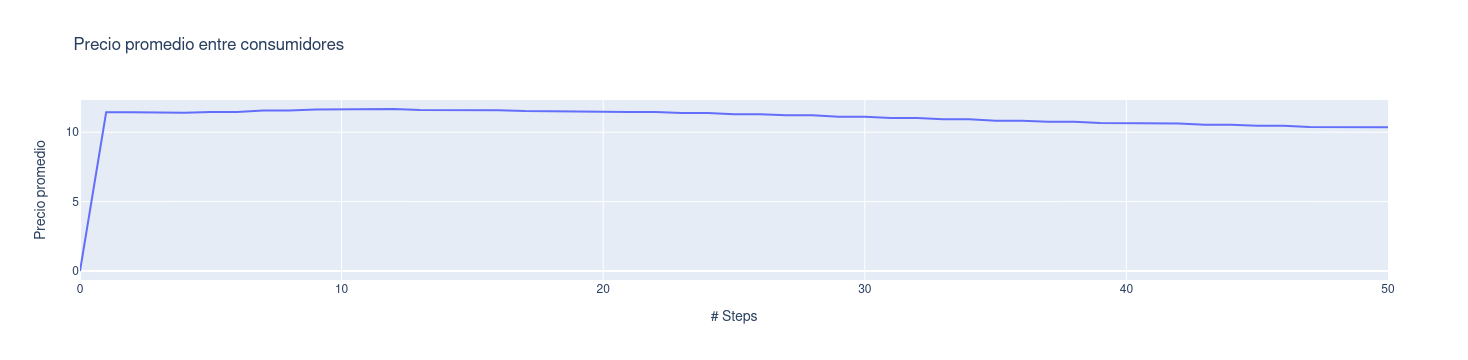

In [156]:
NumericalSeries.show_up(
    "average_consumer_price",
    runner=runner,
    plot_title="Precio promedio entre consumidores",
    yaxis_title="Precio promedio",
)

In [157]:
NumericalSeries.show_up(
    "average_producer_price",
    runner=runner,
    plot_title="Precio promedio entre productores",
    yaxis_title="Precio promedio",
)

In [158]:
productores = set(runner.experiments[0]._by_type[1])
first = runner.experiments[0].series['price_lattice'][0]
last = runner.experiments[0].series['price_lattice'][40]
productores_first = [ first[i][j] for (i, j) in productores ]
productores_last = [ last[i][j] for (i, j) in productores ]

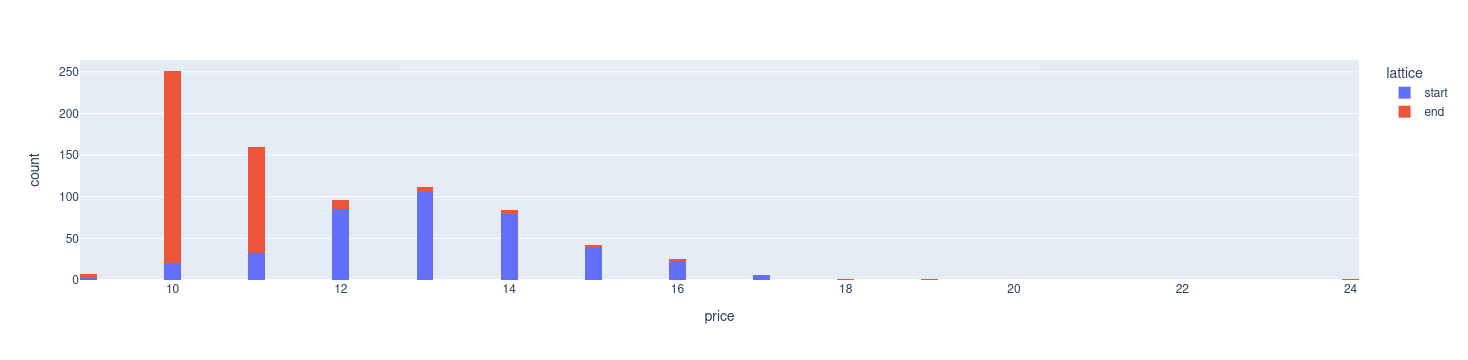

In [159]:
first = runner.experiments[0].series['price_lattice'][0]
ten_h = runner.experiments[0].series['price_lattice'][10]
twenty_h = runner.experiments[0].series['price_lattice'][20]
thirthy_h = runner.experiments[0].series['price_lattice'][30]
last = runner.experiments[0].series['price_lattice'][40]

import pandas as pd
import plotly.express as px
first_data = [[price, "start"] for price in productores_first]
last_data = [[price, "end"] for price in productores_last]
data = first_data + last_data

fig = px.histogram(pd.DataFrame(data, columns=["price", "lattice"]),
                   x="price",
                   nbins=100,
                   color="lattice")
fig.show()